# Siloam Recomissioning

## Multi Linear Regression Method

In [1]:
import pandas as pd
import statsmodels.api as sts
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sns
from ipywidgets import interactive

In [2]:
df = pd.read_excel("mrccc_dataset.xlsx")
df

,raw ts,timestamp,M/D/YYYY,h:mm:ss,isSunday,isSaturday,isWeekDay,Before 5,5 to 6,6 to 7,7 to 9,9 to 10,10 to 17,17 to 18,18 to 19,19 to 20,20 to 21,Temp,ΔT(18degC),Total kW Real
0,2019-09-02T23:00:00+07:00 Jakarta,9/02/19 23:00:00,2019-09-02,23:00:00,0,0,1,0,0,0,0,0,0,0,0,0,0,28,10,1048.084351
1,2019-09-03T14:00:00+07:00 Jakarta,9/03/19 14:00:00,2019-09-03,14:00:00,0,0,1,0,0,0,0,0,1,0,0,0,0,33,15,1492.970337
2,2019-09-03T15:00:00+07:00 Jakarta,9/03/19 15:00:00,2019-09-03,15:00:00,0,0,1,0,0,0,0,0,1,0,0,0,0,32,14,1731.736450
3,2019-09-03T16:00:00+07:00 Jakarta,9/03/19 16:00:00,2019-09-03,16:00:00,0,0,1,0,0,0,0,0,1,0,0,0,0,32,14,1638.665894
4,2019-09-03T17:00:00+07:00 Jakarta,9/03/19 17:00:00,2019-09-03,17:00:00,0,0,1,0,0,0,0,0,1,0,0,0,0,31,13,1613.917603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,2019-12-31T19:00:00+07:00 Jakarta,12/31/19 19:00:00,2019-12-31,19:00:00,0,0,1,0,0,0,0,0,0,0,1,0,0,31,13,1024.062622
2863,2019-12-31T20:00:00+07:00 Jakarta,12/31/19 20:00:00,2019-12-31,20:00:00,0,0,1,0,0,0,0,0,0,0,0,1,0,30,12,980.383179
2864,2019-12-31T21:00:00+07:00 Jakarta,12/31/19 21:00:00,2019-12-31,21:00:00,0,0,1,0,0,0,0,0,0,0,0,0,1,30,12,937.722168
2865,2019-12-31T22:00:00+07:00 Jakarta,12/31/19 22:00:00,2019-12-31,22:00:00,0,0,1,0,0,0,0,0,0,0,0,0,0,29,11,909.774292


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   raw ts         2867 non-null   object        
 1   timestamp      2867 non-null   object        
 2   M/D/YYYY       2867 non-null   datetime64[ns]
 3   h:mm:ss        2867 non-null   object        
 4   isSunday       2867 non-null   int64         
 5   isSaturday     2867 non-null   int64         
 6   isWeekDay      2867 non-null   int64         
 7   Before 5       2867 non-null   int64         
 8   5 to 6         2867 non-null   int64         
 9   6 to 7         2867 non-null   int64         
 10  7 to 9         2867 non-null   int64         
 11  9 to 10        2867 non-null   int64         
 12  10 to 17       2867 non-null   int64         
 13  17 to 18       2867 non-null   int64         
 14  18 to 19       2867 non-null   int64         
 15  19 to 20       2867 n

In [5]:
df['timestamp']=df['timestamp'].astype('datetime64')

In [6]:
drop_list = ['raw ts', 
             'timestamp',
             'M/D/YYYY',
             'h:mm:ss',
             'isSunday',
             'Temp',
             'ΔT(18degC)',
             '5 to 6'
            ]
df_clean = df.drop(drop_list, axis=1)
df_clean

,isSaturday,isWeekDay,Before 5,6 to 7,7 to 9,9 to 10,10 to 17,17 to 18,18 to 19,19 to 20,20 to 21,Total kW Real
0,0,1,0,0,0,0,0,0,0,0,0,1048.084351
1,0,1,0,0,0,0,1,0,0,0,0,1492.970337
2,0,1,0,0,0,0,1,0,0,0,0,1731.736450
3,0,1,0,0,0,0,1,0,0,0,0,1638.665894
4,0,1,0,0,0,0,1,0,0,0,0,1613.917603
...,...,...,...,...,...,...,...,...,...,...,...,...
2862,0,1,0,0,0,0,0,0,1,0,0,1024.062622
2863,0,1,0,0,0,0,0,0,0,1,0,980.383179
2864,0,1,0,0,0,0,0,0,0,0,1,937.722168
2865,0,1,0,0,0,0,0,0,0,0,0,909.774292


In [7]:
X = df_clean.iloc[:,:-1].values
y = df_clean.iloc[:,-1].values
print(X.shape)
print(y.shape)

(2867, 11)
(2867,)


In [8]:
data_corr = df_clean.corr()
data_corr

,isSaturday,isWeekDay,Before 5,6 to 7,7 to 9,9 to 10,10 to 17,17 to 18,18 to 19,19 to 20,20 to 21,Total kW Real
isSaturday,1.000000,-0.645786,0.000903,0.000326,0.000472,0.000326,-0.000247,-0.000384,-0.000384,-0.000384,-0.000384,-0.089443
isWeekDay,-0.645786,1.000000,-0.001399,-0.000506,-0.000731,-0.000506,0.000383,0.000595,0.000595,0.000595,0.000595,0.273427
Before 5,0.000903,-0.001399,1.000000,-0.119837,-0.173269,-0.119837,-0.369779,-0.120362,-0.120362,-0.120362,-0.120362,-0.612342
6 to 7,0.000326,-0.000506,-0.119837,1.000000,-0.062612,-0.043304,-0.133623,-0.043494,-0.043494,-0.043494,-0.043494,0.015643
7 to 9,0.000472,-0.000731,-0.173269,-0.062612,1.000000,-0.062612,-0.193200,-0.062886,-0.062886,-0.062886,-0.062886,0.187281
9 to 10,0.000326,-0.000506,-0.119837,-0.043304,-0.062612,1.000000,-0.133623,-0.043494,-0.043494,-0.043494,-0.043494,0.198094
10 to 17,-0.000247,0.000383,-0.369779,-0.133623,-0.193200,-0.133623,1.000000,-0.134207,-0.134207,-0.134207,-0.134207,0.614034
17 to 18,-0.000384,0.000595,-0.120362,-0.043494,-0.062886,-0.043494,-0.134207,1.000000,-0.043684,-0.043684,-0.043684,0.079546
18 to 19,-0.000384,0.000595,-0.120362,-0.043494,-0.062886,-0.043494,-0.134207,-0.043684,1.000000,-0.043684,-0.043684,0.004642
19 to 20,-0.000384,0.000595,-0.120362,-0.043494,-0.062886,-0.043494,-0.134207,-0.043684,-0.043684,1.000000,-0.043684,-0.025858


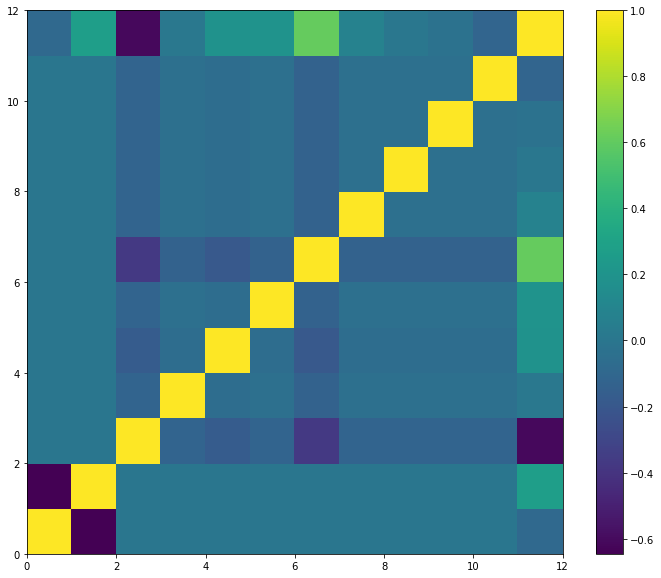

In [9]:
plt.figure(figsize=(12,10))
plt.pcolor(data_corr)
plt.colorbar()
plt.show()

In [10]:
xname = ['intercept']
variables = list(df_clean.columns.drop('Total kW Real'))
xname.extend(variables)

X = sts.add_constant(X)
est = sts.regression.linear_model.OLS(y, X).fit()
coef_CHW = est.params
print(est.summary(xname = xname))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1043.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:23:20   Log-Likelihood:                -17711.
No. Observations:                2867   AIC:                         3.545e+04
Df Residuals:                    2855   BIC:                         3.552e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    893.5266      8.165    109.435      0.0

## Neural Network Method

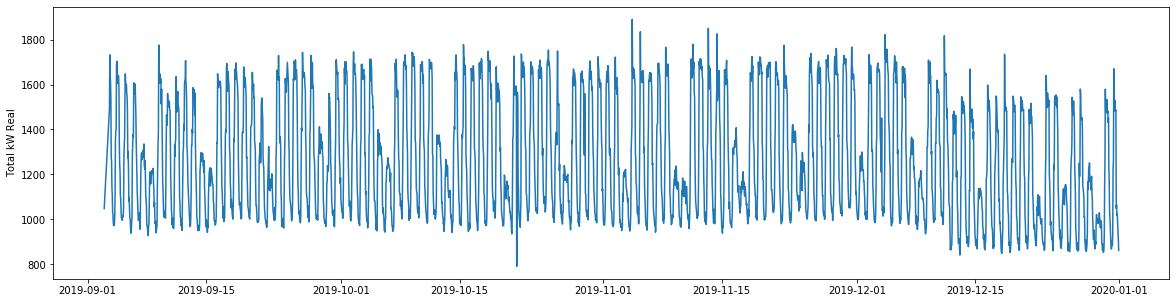

In [10]:
plt.figure(figsize=(20,5))
plt.plot(df.timestamp, df['Total kW Real'])
plt.ylabel('Total kW Real')
plt.show()

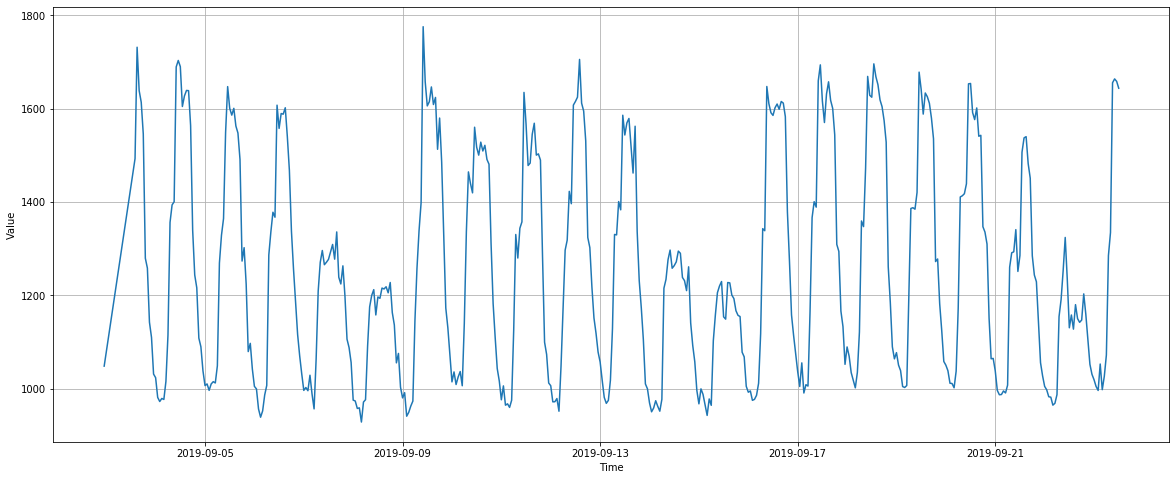

In [17]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.figure(figsize=(20,8))
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel('Time')
    plt.ylabel('Value')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
plot_series(df.timestamp, df['Total kW Real'], start=0, end=480)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(2500,)
Epoch 1/100
10/10 [==============================] - 2s 213ms/step - loss: 1265.0377 - mae: 1265.5377 - lr: 1.0000e-08
Epoch 2/100
10/10 [==============================] - 2s 230ms/step - loss: 1258.4988 - mae: 1258.9988 - lr: 1.1220e-08
Epoch 3/100
10/10 [==============================] - 3s 264ms/step - loss: 1250.2467 - mae: 1250.7467 - lr: 1.2589e-08
Epoch 4/100
10/10 [==============================] - 2s 209ms/step - loss: 1239.5228 - mae: 1240.0228 - lr: 1.4125e-08
Epoch 5/100
10/10 [==============================] - 2s 196ms/step - loss: 1226.9746 - mae: 1227.4746 - lr: 1.5849e-08
Epoch 6/100
10/10 [==============================] - 2s 236ms/step - loss: 1218.9114 - mae: 1219.4114 - lr: 1.7783e-08
Epoch 7/100
10/10 [==============================] - 2s 224ms/step - loss: 1212.2834 - mae: 1212.7834 - lr: 1.9953e-08
Epoch 8/100
10/10 [==============================] - 2s 187ms/ste

[1e-08, 0.0001, 0, 60]

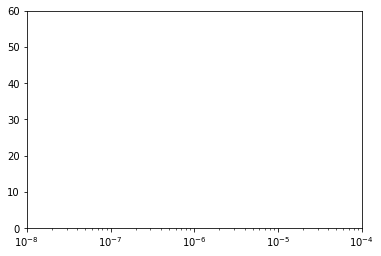

In [18]:
import tensorflow as tf
from tensorflow import keras

series = df['Total kW Real']
time = df.timestamp

split_time = 2500

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [19]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
25/25 [==============================] - 2s 85ms/step - loss: 705.6021 - mae: 706.1018
Epoch 2/500
25/25 [==============================] - 2s 89ms/step - loss: 252.0195 - mae: 252.5191
Epoch 3/500
25/25 [==============================] - 2s 87ms/step - loss: 229.6606 - mae: 230.1602
Epoch 4/500
25/25 [==============================] - 2s 83ms/step - loss: 221.2405 - mae: 221.7402
Epoch 5/500
25/25 [==============================] - 2s 82ms/step - loss: 228.2124 - mae: 228.7121
Epoch 6/500
25/25 [==============================] - 2s 84ms/step - loss: 219.5430 - mae: 220.0426
Epoch 7/500
25/25 [==============================] - 2s 83ms/step - loss: 212.1273 - mae: 212.6270
Epoch 8/500
25/25 [==============================] - 2s 82ms/step - loss: 192.5676 - mae: 193.0671
Epoch 9/500
25/25 [==============================] - 2s 82ms/step - loss: 179.4803 - mae: 179.9798
Epoch 10/500
25/25 [==============================] - 2s 82ms/step - loss: 194.0545 - mae: 194.5540
Epoch 11/

In [20]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

KeyError: (Ellipsis, None)

NameError: name 'rnn_forecast' is not defined

<Figure size 720x432 with 0 Axes>

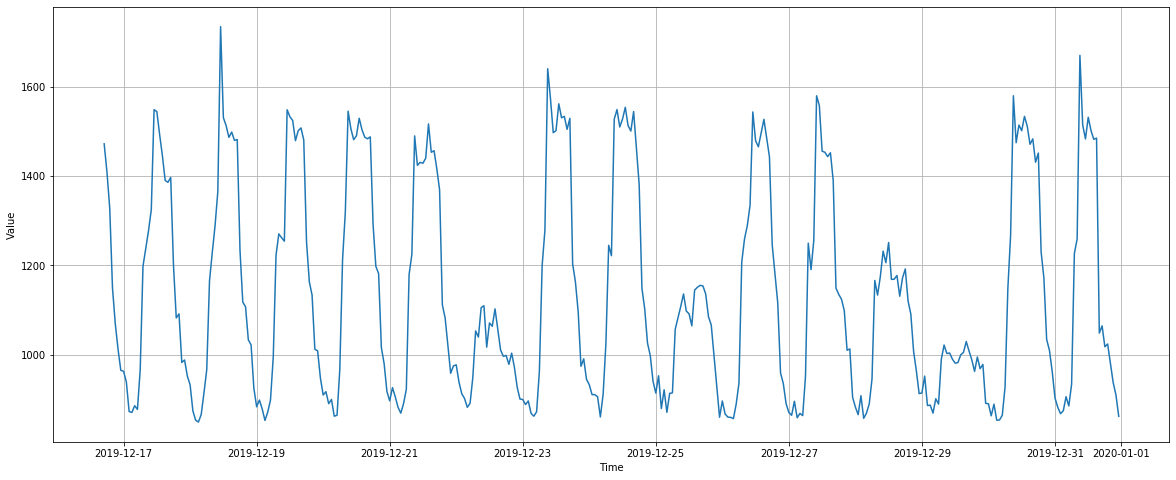

In [21]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

print(tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy())

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)

plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

print(rnn_forecast)